<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/ML_Lab_Experiment_04%201RUA24CSE0059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 04
**Objective:** Implement K-NN to perform classification.
<hr>

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[Enter Your Full Name]_     |
| 🆔 **USN**              | _[Enter Your USN]_           |
| **Section**        | _[Enter Your Section]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [1]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


🧑‍💻 System Details
----------------------------------------
User Name           : root
Timestamp           : 2025-09-04 04:27:29
OS                  : Linux 6.1.123+
Processor           : x86_64
RAM (GB)            : 12.67
Python Version      : 3.12.11
Working Directory   : /content


### Student Tasks
<hr>

##### Learning Objectives
1. Understand the fundamentals of K-NN classification and its applications
2. Implement K-NN using scikit-learn library
3. Analyze the relationship between input features and class labels
4. Evaluate model performance using appropriate metrics
5. Visualize classification results and interpret confusion matrix

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for Classification task.

In [2]:
# [ Edit this cell ] Write your code below this line and execute the cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [3]:
# [ Edit this cell ] Write your code below this line and execute the cell
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 03:**
- Perform Exploratory Data Analysis

In [4]:
# [ Edit this cell ] Write your code below this line and execute the cell
print(df.shape)
print(df.isna().sum())
df_updated = df.dropna()
df_updated

(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Step 04:**
- Data visualization and class balance analysis: Create visualizations to understand class distribution and feature relationships.

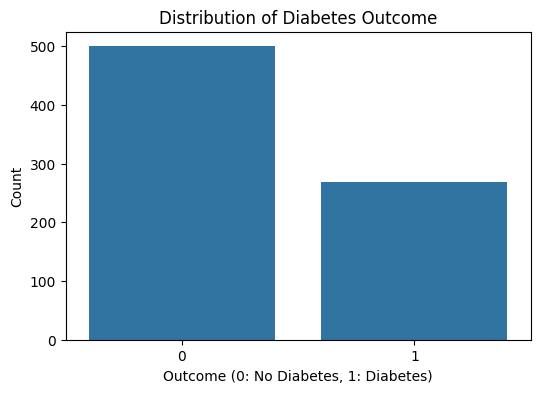

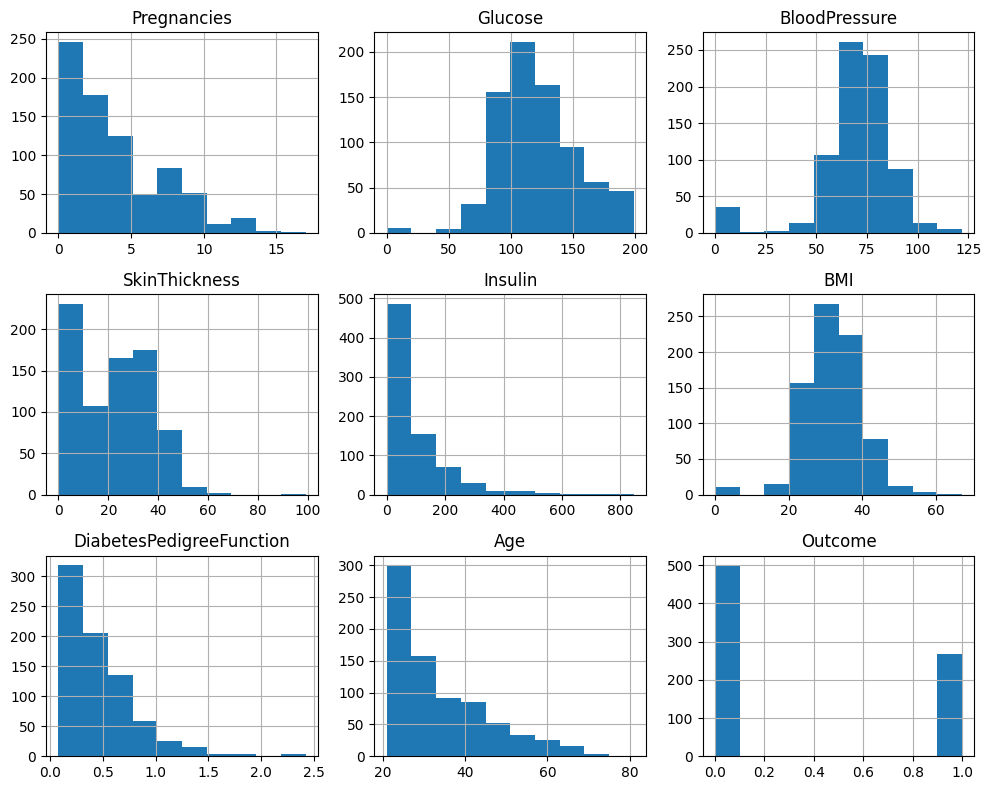

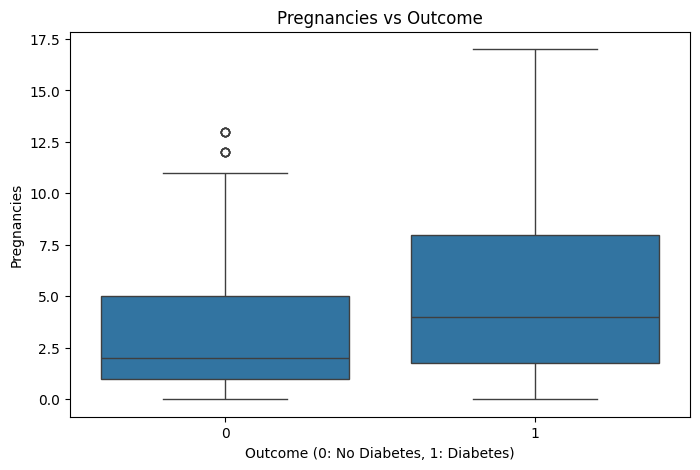

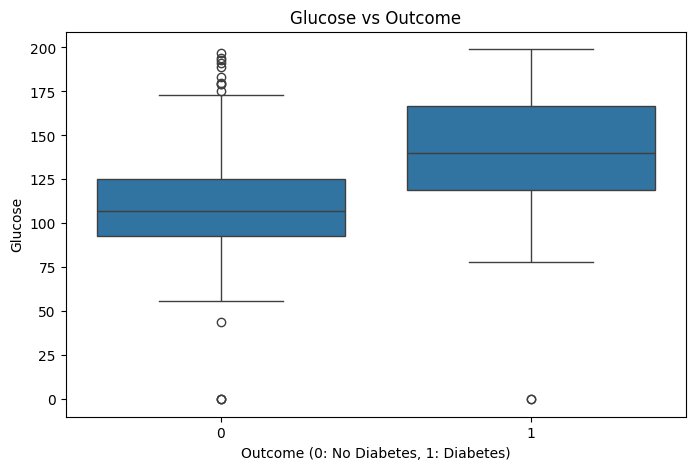

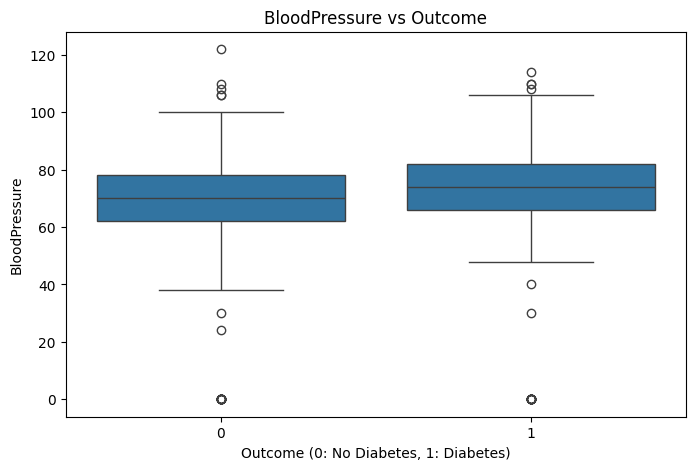

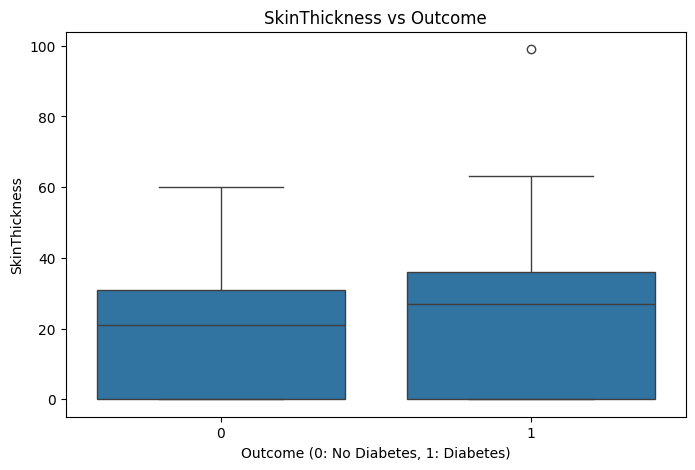

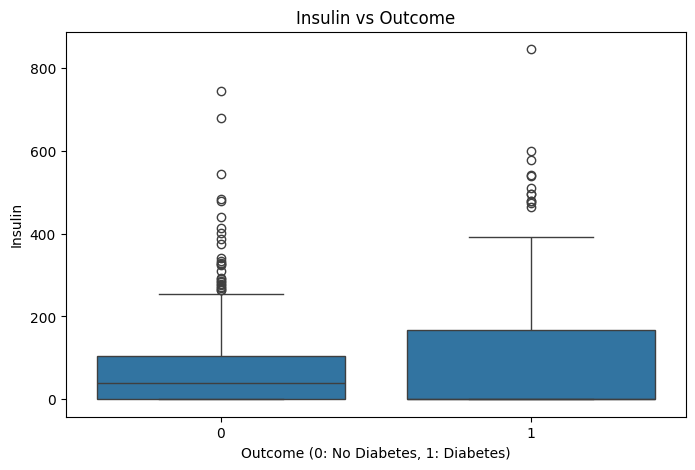

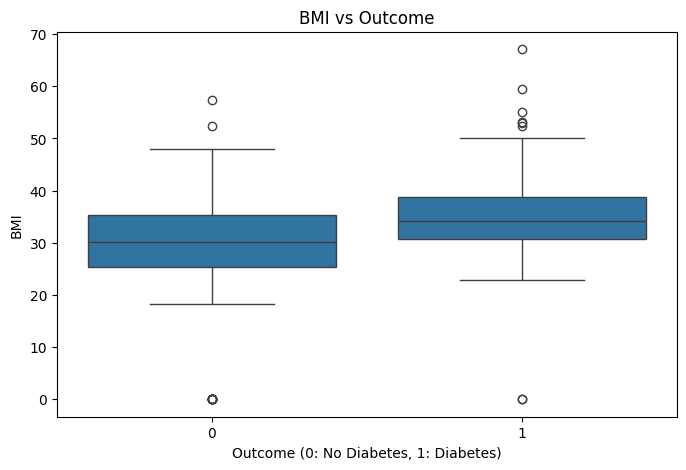

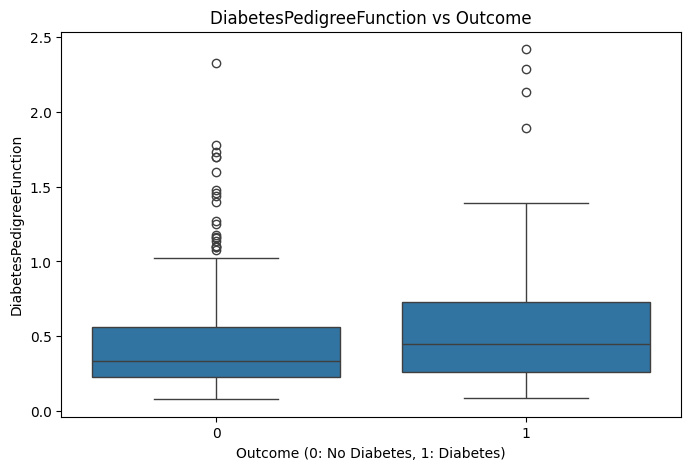

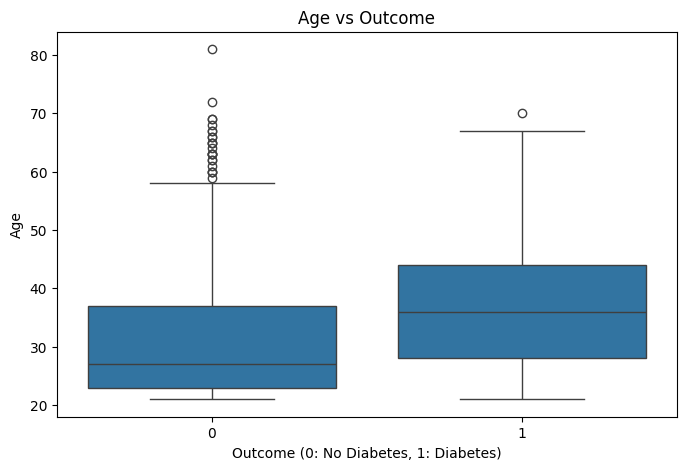

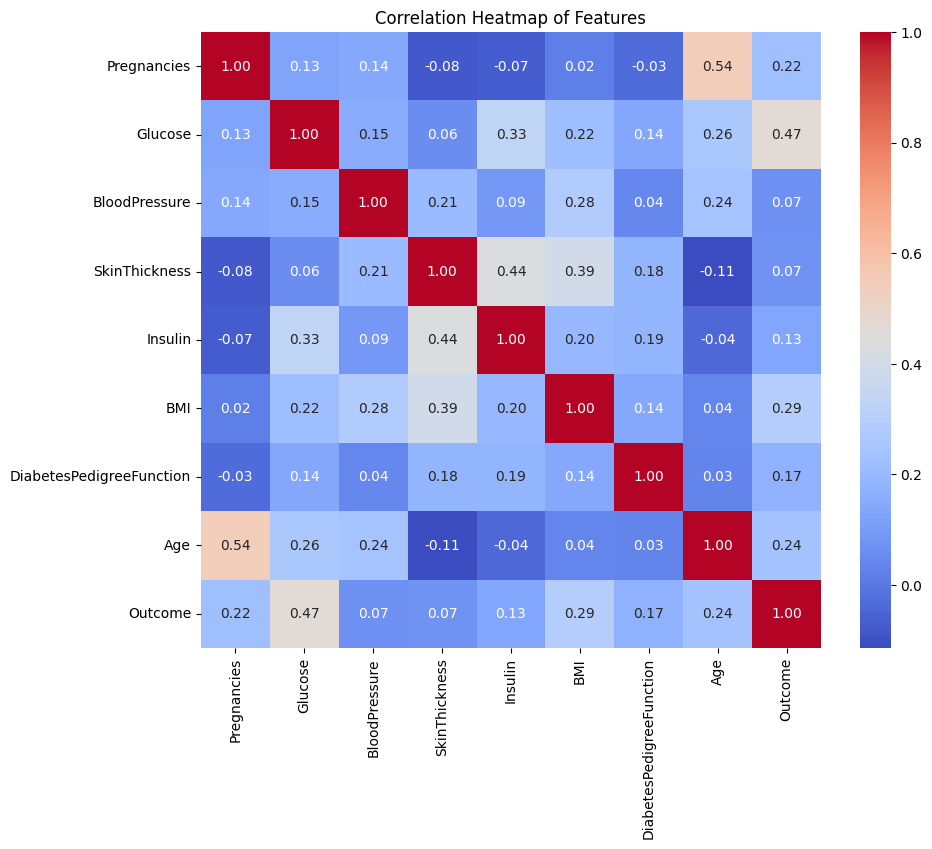

In [8]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Class balance analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Feature distributions
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Relationship between features and Outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


**Step 05:**
- Data preprocessing and feature selection - Handle missing values, select relevant features, and prepare data for modeling.

In [10]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Replace 0 values with NaN in specified columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Handle missing values by replacing NaN with the mean of the column
df.fillna(df.mean(), inplace=True)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
display(X.head())
display(y.head())


Shape of X: (768, 8)
Shape of y: (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


,Outcome
0,1
1,0
2,1
3,0
4,1


**Step 06:**
- Split data into training and testing sets - Divide the dataset into training and testing portions for model validation.

In [11]:
# [ Edit this cell ] Write your code below this line and execute the cell

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)




Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


**Step 07:**
-  Build and train the K-NN classification model - Create and train the K-NN classifier using scikit-learn.

In [13]:
# [ Edit this cell ] Write your code below this line and execute the cell

from sklearn.neighbors import KNeighborsClassifier

# Build and train the K-NN classification model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("K-NN model trained successfully!")



K-NN model trained successfully!


**Step 08:**
- Model evaluation and performance metrics - Evaluate the model using appropriate classification metrics (accuracy, confusion matrix, classification report, etc.).

In [14]:
# [ Edit this cell ] Write your code below this line and execute the cell

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.67

Confusion Matrix:
[[78 22]
 [29 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       100
           1       0.53      0.46      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



**Step 09:**
- Visualize results and model interpretation - Visualize confusion matrix, decision boundaries (if applicable), and interpret model results.

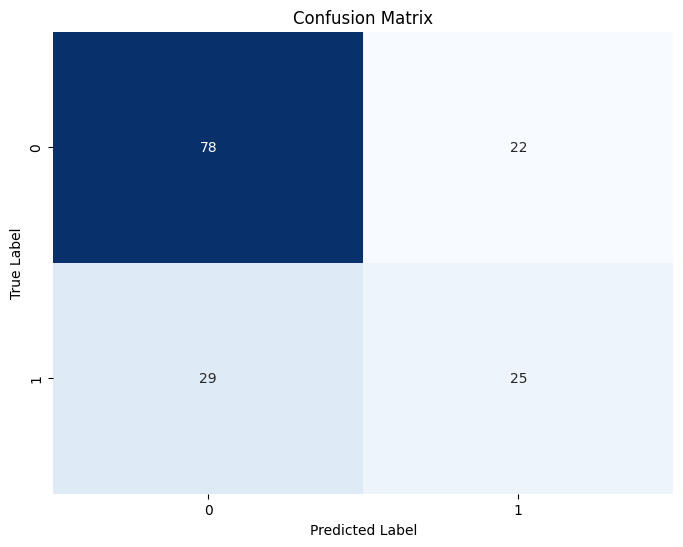


Interpretation of Confusion Matrix:
True Positives (TP): 25 (Correctly predicted positive cases)
True Negatives (TN): 78 (Correctly predicted negative cases)
False Positives (FP): 22 (Incorrectly predicted positive cases - Type I error)
False Negatives (FN): 29 (Incorrectly predicted negative cases - Type II error)


In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Interpretation of the confusion matrix
print("\nInterpretation of Confusion Matrix:")
print(f"True Positives (TP): {conf_matrix[1, 1]} (Correctly predicted positive cases)")
print(f"True Negatives (TN): {conf_matrix[0, 0]} (Correctly predicted negative cases)")
print(f"False Positives (FP): {conf_matrix[0, 1]} (Incorrectly predicted positive cases - Type I error)")
print(f"False Negatives (FN): {conf_matrix[1, 0]} (Incorrectly predicted negative cases - Type II error)")

### ✅ Rubric: KNN (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on K-NN classification modeling and analysis.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, initial exploration.                   |      3        |                     |
| **Model Implementation and Model Implementation**         | Correct implementation of K-NN using scikit-learn; appropriate value of K and Accurate calculation and interpretation of classification metrics (accuracy, confusion matrix, etc.). .           |      3        |                     |
| **Visualization & Analysis**     | Effective visualizations of results, confusion matrix, and interpretation of classifier’s behavior. |      2        |                     |
| **Documentation & Viva Insight** | Brief comments, explanations, and ability to answer questions during viva on technique choices.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2

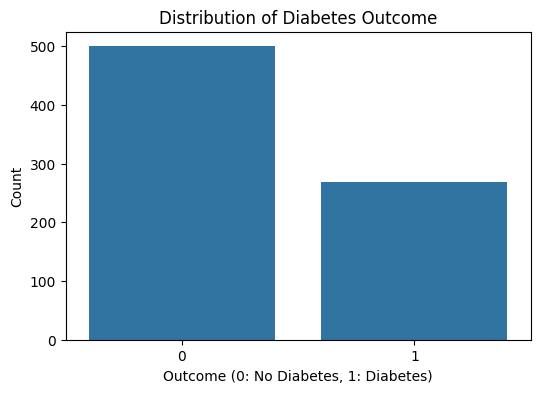

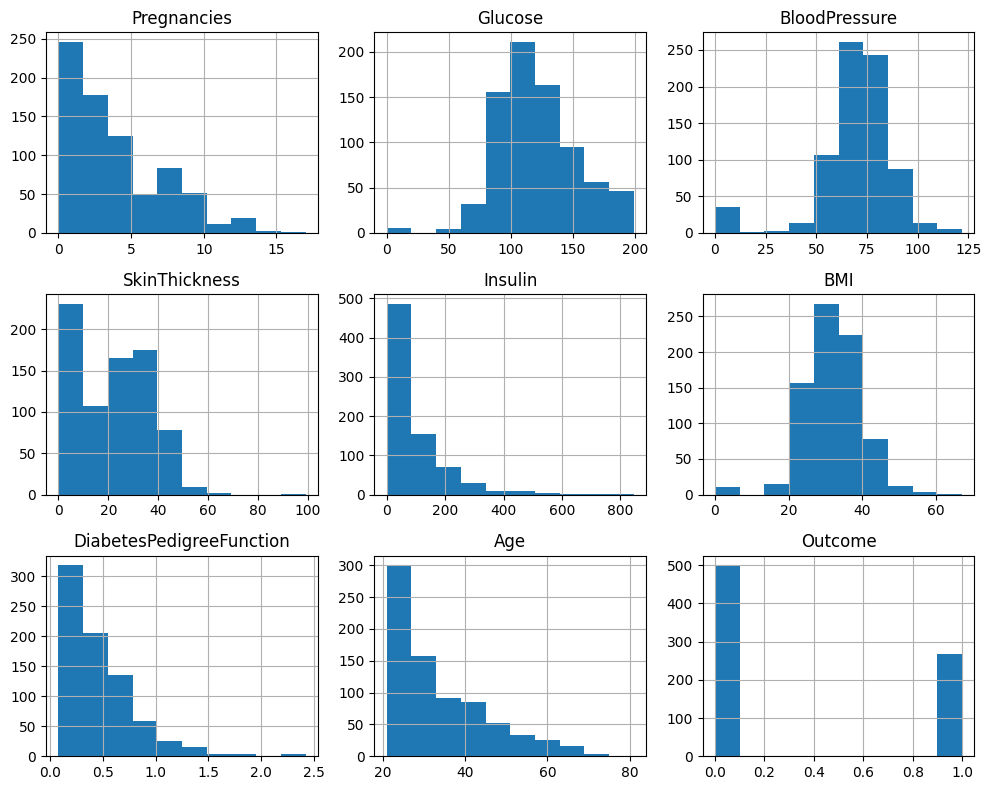

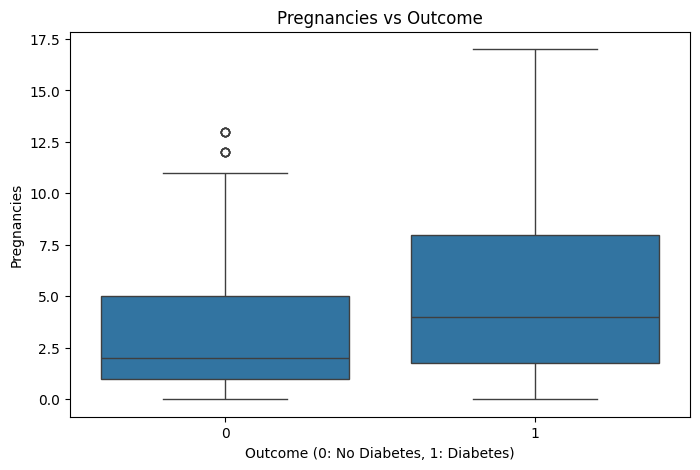

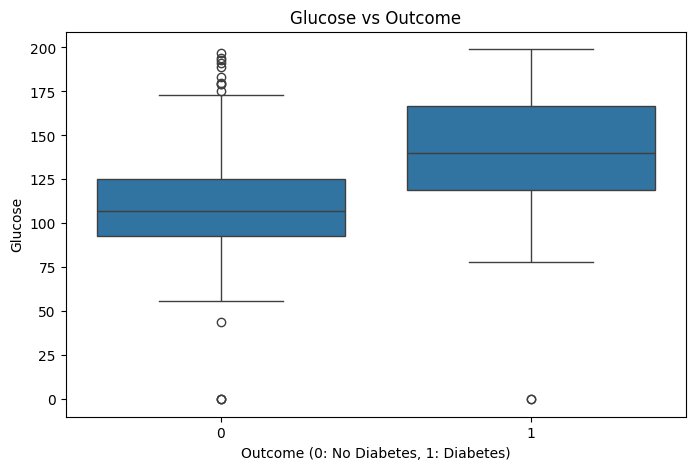

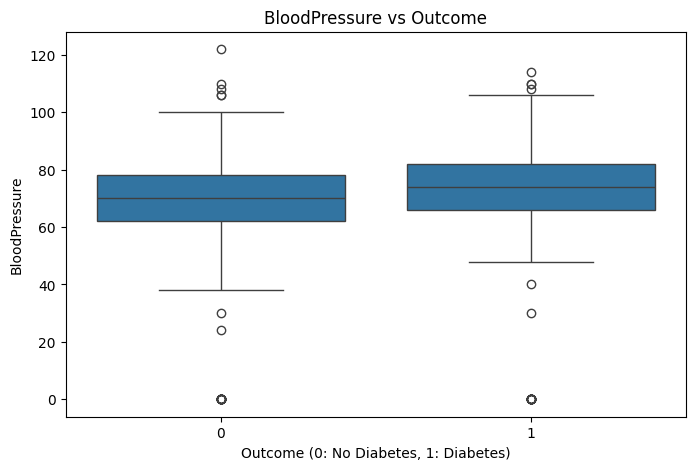

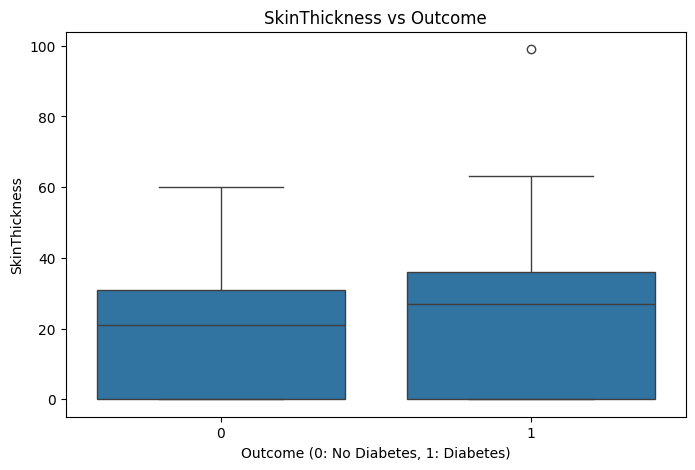

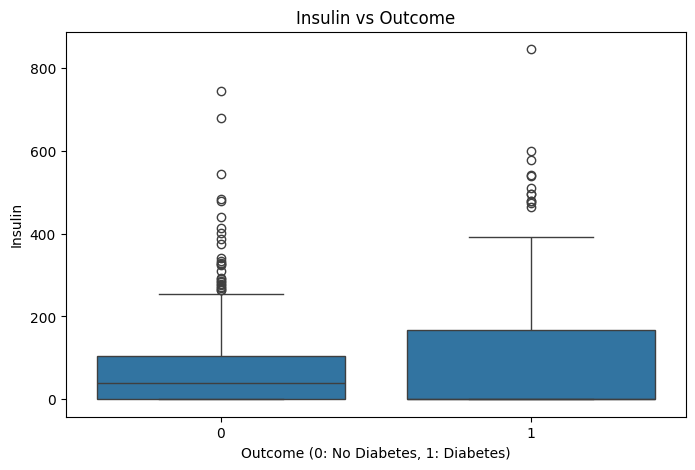

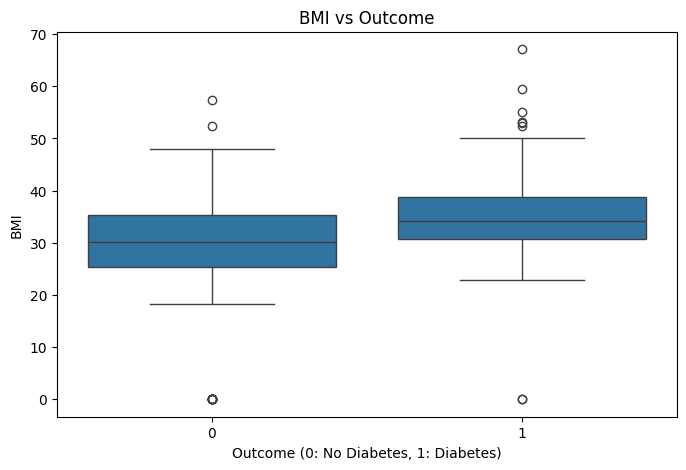

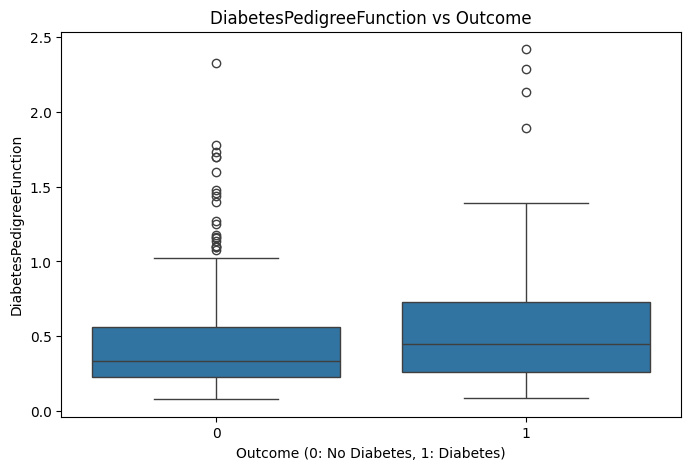

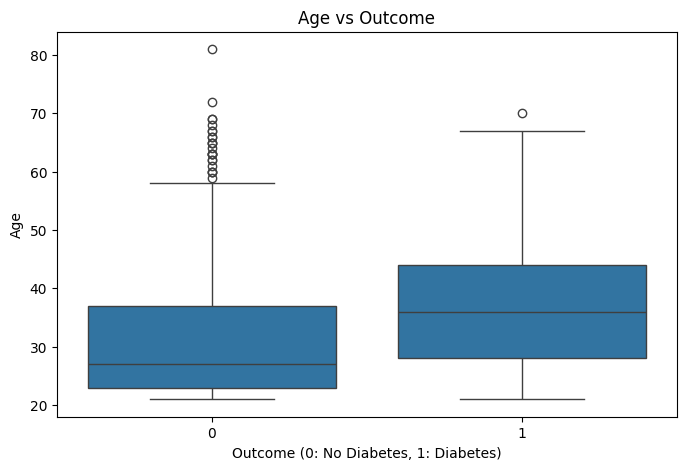

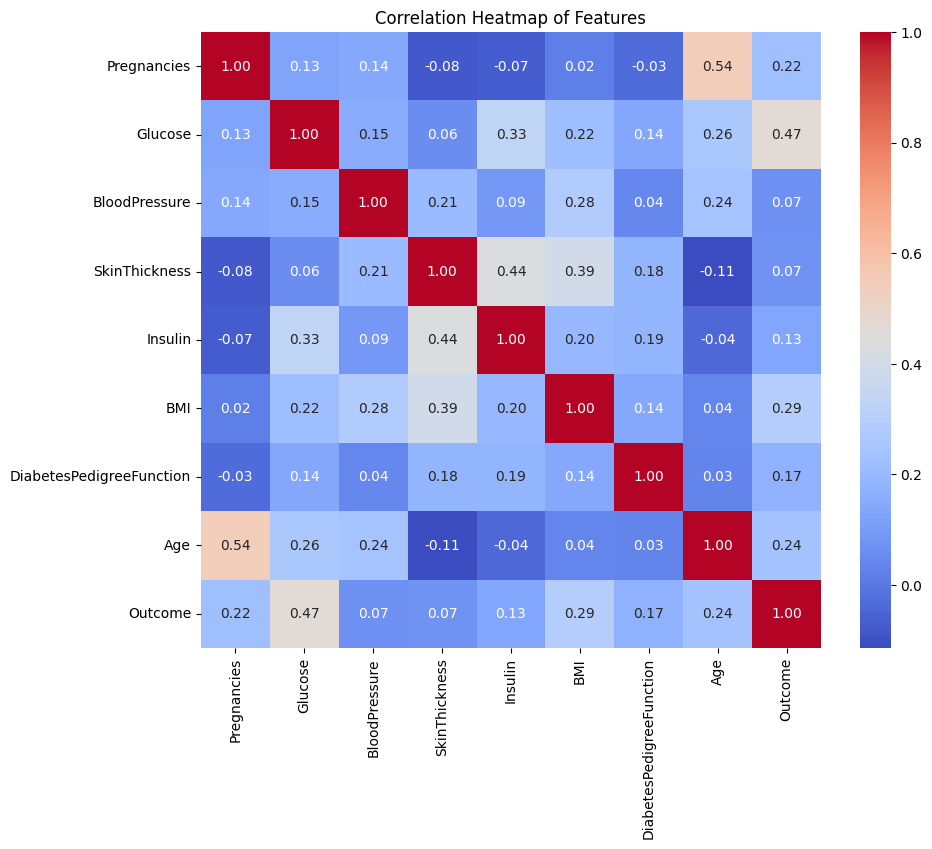

In [9]:
# Replace 0 values with NaN in specified columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Handle missing values by replacing NaN with the mean of the column
df.fillna(df.mean(), inplace=True)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
display(X.head())
display(y.head())

Shape of X: (768, 8)
Shape of y: (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


,Outcome
0,1
1,0
2,1
3,0
4,1


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the K-NN classification model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("K-NN model trained successfully!")

K-NN model trained successfully!
